# Hanoi_daily

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_daily = pd.read_csv("/Users/user/Desktop/HN/Hanoi Daily.csv")
df_daily['datetime'] = pd.to_datetime(df_daily['datetime'])

## Sealevelpressure

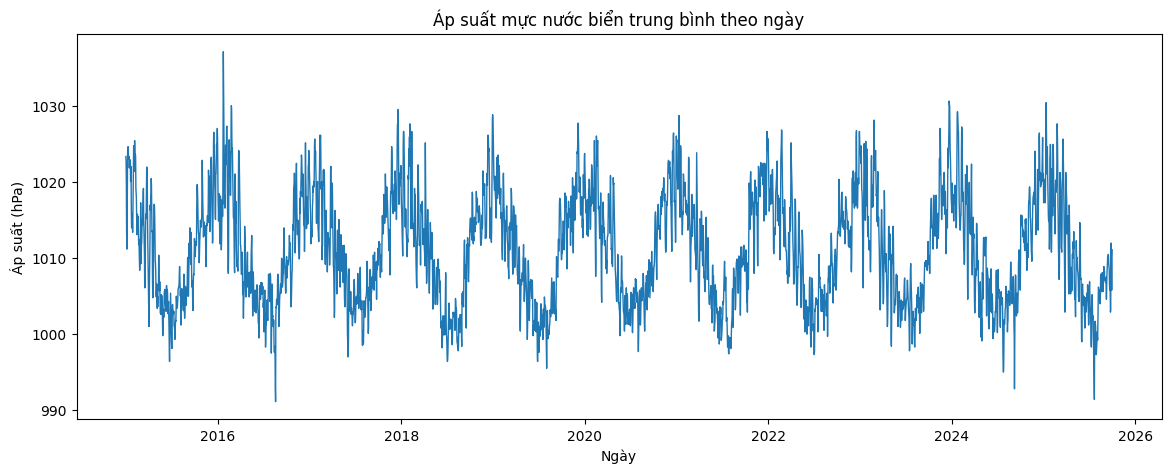

In [9]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily, x='datetime', y='sealevelpressure', linewidth=1)
plt.title("Áp suất mực nước biển trung bình theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Áp suất (hPa)")
plt.show()


**Lý do chọn**: Dữ liệu theo ngày → biến thiên chậm, phù hợp với biểu đồ đường để quan sát xu hướng dài hạn.

**Ý nghĩa**:
- Khi áp suất giảm mạnh → khả năng cao có nhiễu động khí quyển hoặc bão.

- Khi áp suất ổn định hoặc tăng → thời tiết quang đãng.


## Cloudcover:

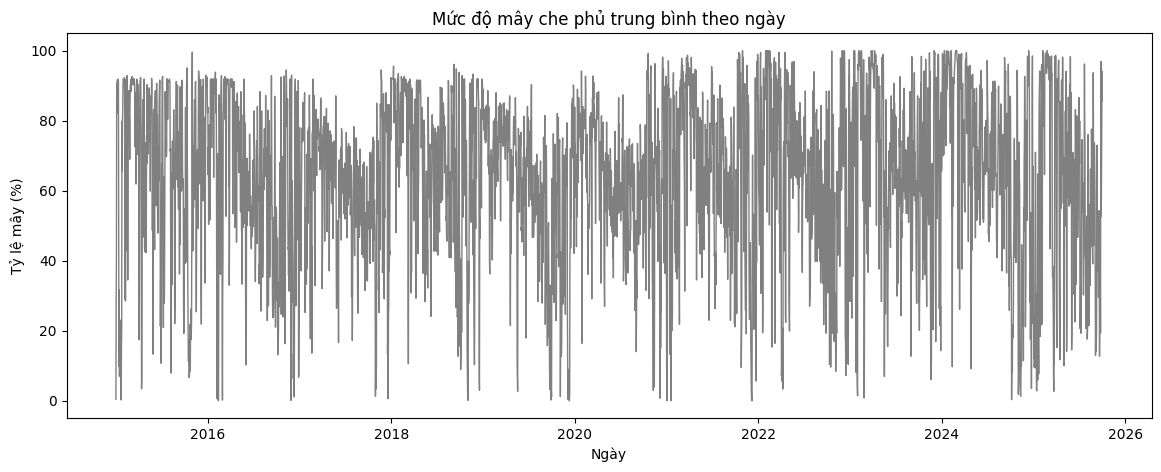

In [10]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily, x='datetime', y='cloudcover', color='gray', linewidth=1)
plt.title("Mức độ mây che phủ trung bình theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Tỷ lệ mây (%)")
plt.show()


**Lý do chọn**: Cho thấy xu hướng tổng thể về độ che phủ bầu trời qua các ngày.

**Ý nghĩa**:
- Mức độ mây cao → giảm lượng bức xạ mặt trời, thời tiết âm u.

- Các giai đoạn ít mây → trời quang, nhiệt độ cao hơn và UV mạnh hơn.



## Visibility

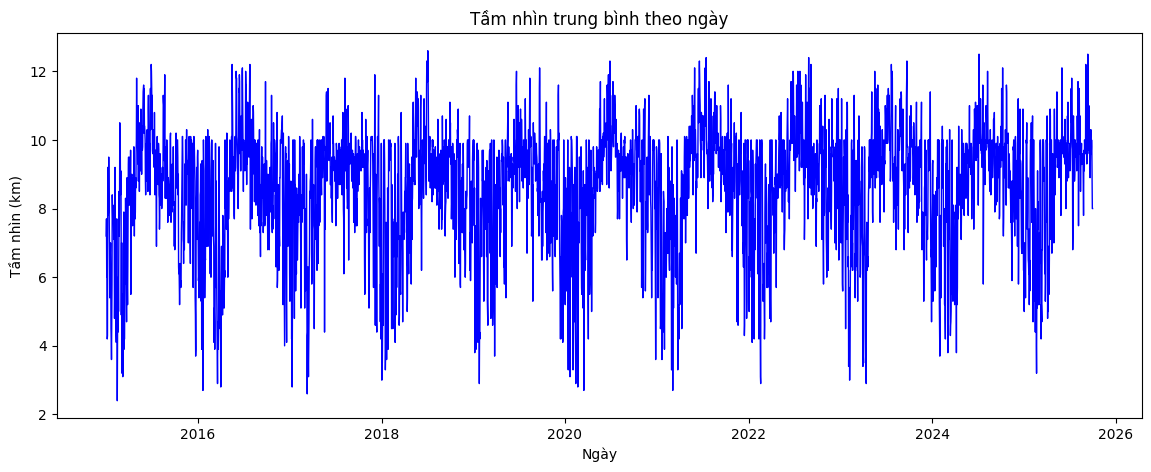

In [11]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily, x='datetime', y='visibility', color='blue', linewidth=1)
plt.title("Tầm nhìn trung bình theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Tầm nhìn (km)")
plt.show()


**Lý do chọn**: Dễ nhận biết ngày có sương mù, mưa lớn, hoặc ô nhiễm không khí nặng khi tầm nhìn giảm đột ngột.

**Ý nghĩa**:
- Tầm nhìn giảm mạnh → sương mù hoặc ô nhiễm.

- Tầm nhìn cao → trời trong, chất lượng không khí tốt.


## Solarradiation

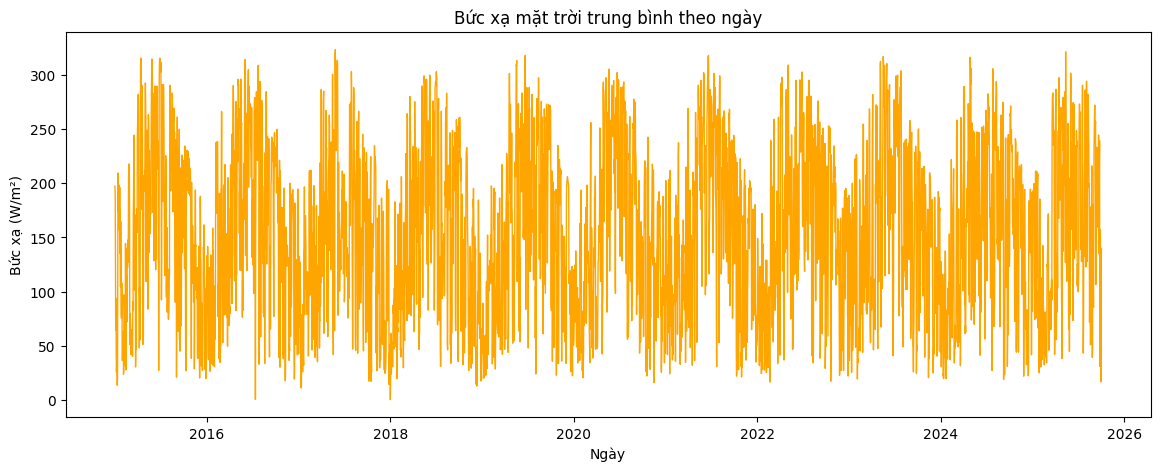

In [12]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily, x='datetime', y='solarradiation', color='orange', linewidth=1)
plt.title("Bức xạ mặt trời trung bình theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Bức xạ (W/m²)")
plt.show()


**Lý do chọn**: Biến này dao động mạnh theo mùa → biểu đồ đường giúp thể hiện rõ sự khác biệt giữa mùa hè và mùa đông.

**Ý nghĩa**:
- Bức xạ cao → nhiệt độ cao và năng lượng mặt trời dồi dào.

- Bức xạ giảm → trời âm u, mưa hoặc nhiều mây.



## Solarenergy

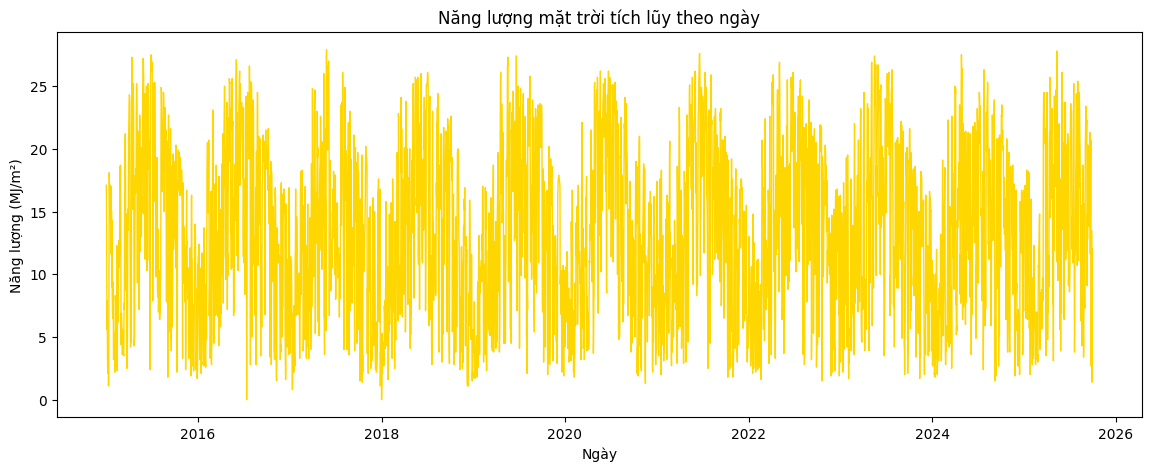

In [13]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily, x='datetime', y='solarenergy', color='gold', linewidth=1)
plt.title("Năng lượng mặt trời tích lũy theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Năng lượng (MJ/m²)")
plt.show()


**Lý do chọn**: 
- Giúp nhận biết ngày có nắng mạnh và kéo dài (tích lũy cao).

- Biến này có liên hệ chặt chẽ với solarradiation.

**Ý nghĩa**:
- Khi solarenergy tăng → trời nắng mạnh, phù hợp phát điện mặt trời.

- Khi giảm → mưa hoặc nhiều mây.


## Uvindex

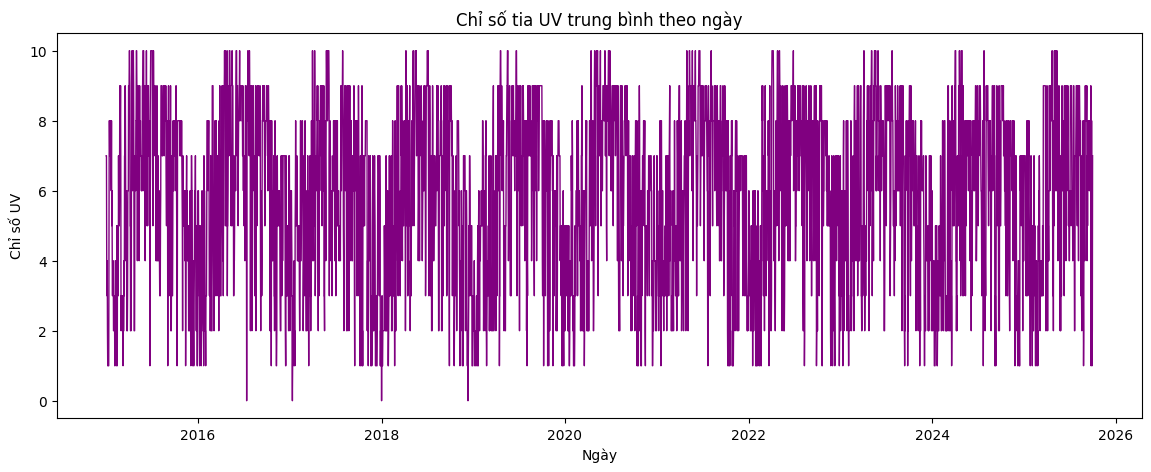

In [14]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily, x='datetime', y='uvindex', color='purple', linewidth=1)
plt.title("Chỉ số tia UV trung bình theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Chỉ số UV")
plt.show()


**Lý do chọn**: UV thay đổi rõ rệt theo mùa → biểu đồ đường thể hiện được mức độ nguy cơ tia cực tím qua các giai đoạn.

**Ý nghĩa**:
- uvindex cao vào tháng 4–8, khi mặt trời lên cao và trời ít mây.

- uvindex thấp → mùa đông, nhiều mây, bức xạ yếu.


## Severerisk

/var/folders/yt/_mwvvxcn7_12mpyyfszzk3y80000gn/T/ipykernel_18179/38764740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_daily, x='severerisk', palette='coolwarm')


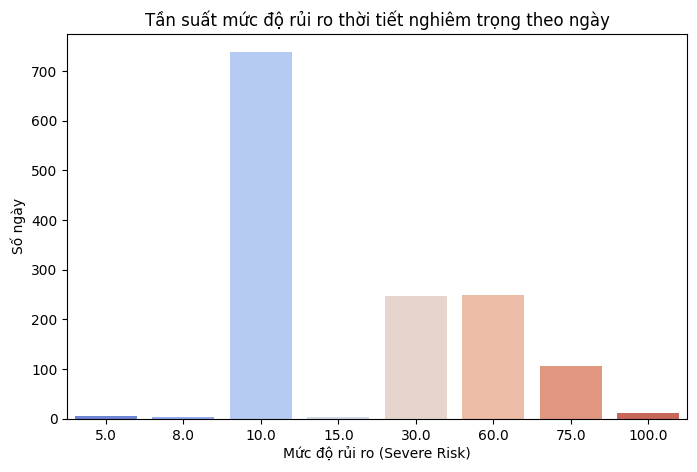

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_daily, x='severerisk', palette='coolwarm')
plt.title("Tần suất mức độ rủi ro thời tiết nghiêm trọng theo ngày")
plt.xlabel("Mức độ rủi ro (Severe Risk)")
plt.ylabel("Số ngày")
plt.show()


**Lý do chọn**: Là biến phân loại (rời rạc), nên biểu đồ cột thể hiện tần suất của từng mức.

**Ý nghĩa**:
- Nếu phần lớn ngày có severerisk thấp → thời tiết ổn định.

- Sự tăng đột ngột ở mức cao → giai đoạn bão, mưa lớn, hoặc nắng nóng cực đoan.



## Sunrise, sunset

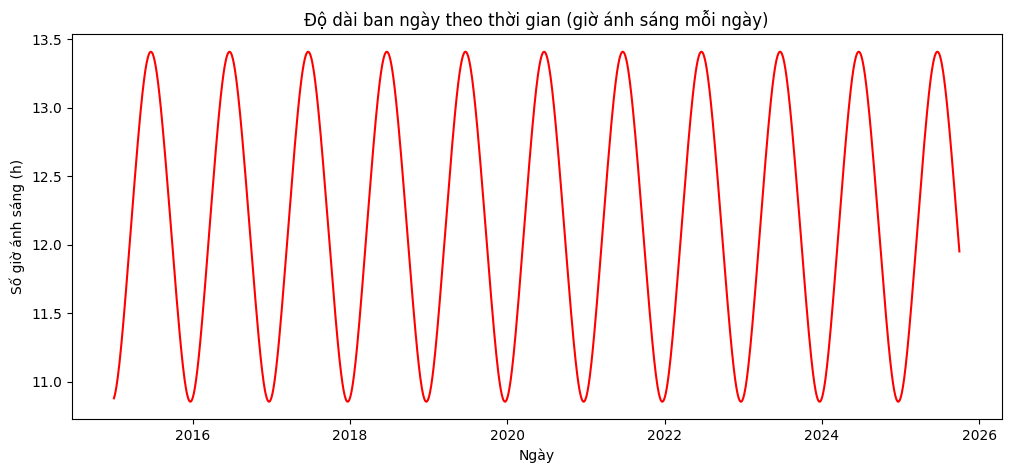

In [16]:
df_daily['sunrise'] = pd.to_datetime(df_daily['sunrise'], errors='coerce')
df_daily['sunset'] = pd.to_datetime(df_daily['sunset'], errors='coerce')

df_daily['day_length'] = (df_daily['sunset'] - df_daily['sunrise']).dt.total_seconds() / 3600
df_daily = df_daily.dropna(subset=['day_length'])

plt.figure(figsize=(12,5))
sns.lineplot(data=df_daily, x='datetime', y='day_length', color='red')
plt.title("Độ dài ban ngày theo thời gian (giờ ánh sáng mỗi ngày)")
plt.xlabel("Ngày")
plt.ylabel("Số giờ ánh sáng (h)")
plt.show()


**Lý do chọn**: Giúp nhận biết chu kỳ mùa vụ — ban ngày dài hơn vào mùa hè và ngắn hơn vào mùa đông.

**Ý nghĩa**: Biểu đồ cho thấy mức thay đổi tự nhiên trong năm, ảnh hưởng đến nhiệt độ, bức xạ và chỉ số UV.



# Hanoi_hourly

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("/Users/user/Desktop/HN/Hanoi Hourly.csv")

# Chuẩn hóa cột thời gian
df['datetime'] = pd.to_datetime(df['datetime'])


## Sealevelpressure

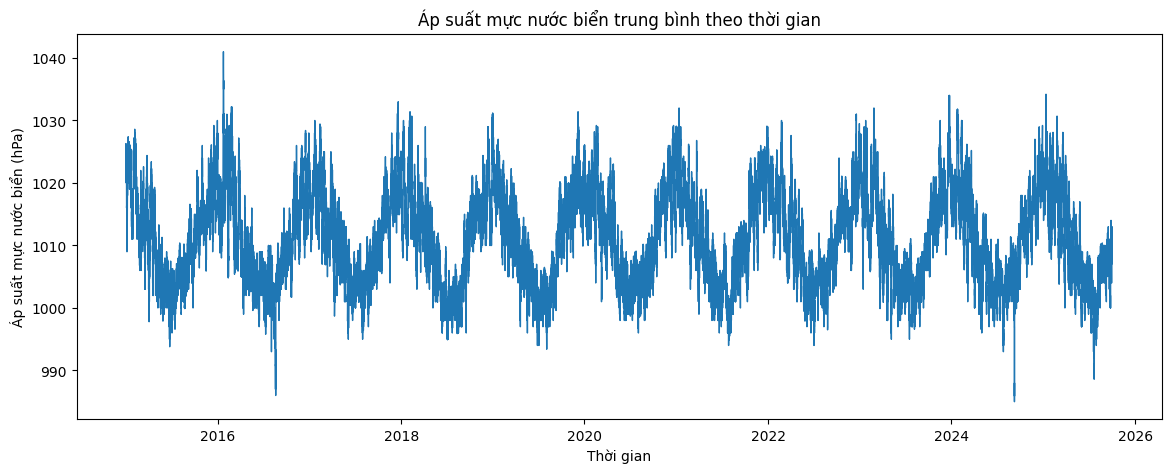

In [18]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='datetime', y='sealevelpressure', linewidth=1)
plt.title("Áp suất mực nước biển trung bình theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Áp suất mực nước biển (hPa)")
plt.show()


**Lý do chọn**:
- Dữ liệu liên tục theo thời gian → biểu đồ đường thể hiện rõ dao động khí áp.

- Áp suất thường biến thiên chậm, nhưng phản ánh sự thay đổi hệ thời tiết (cao/thấp áp).

**Ý nghĩa**:
- Khi áp suất giảm mạnh → có thể báo hiệu thời tiết xấu, mưa hoặc bão.

- Giai đoạn áp suất cao → trời ổn định, khô ráo.

## Cloudcover

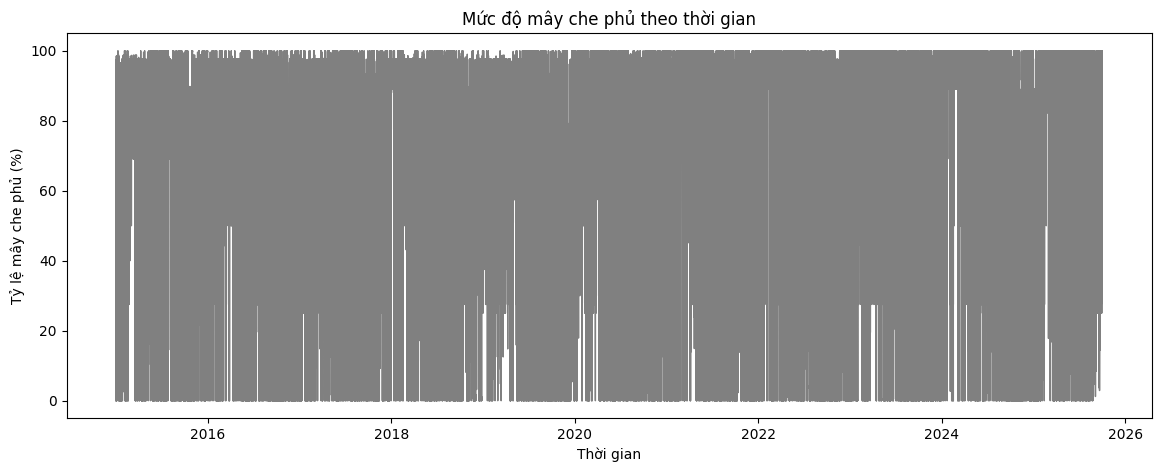

In [19]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='datetime', y='cloudcover', color='gray', linewidth=1)
plt.title("Mức độ mây che phủ theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Tỷ lệ mây che phủ (%)")
plt.show()


**Lý do chọn**:
- Là biến tỉ lệ (0–100%) → biểu đồ đường thể hiện sự thay đổi liên tục theo thời gian.

- Dễ so sánh với các biến khác (bức xạ, nhiệt độ) trong cùng mốc thời gian.

**Ý nghĩa**:
- Thời kỳ mây nhiều (đường cao) thường trùng với giảm bức xạ và nhiệt độ thấp hơn.

- Dao động mây theo chu kỳ ngày đêm có thể thấy rõ trong các giai đoạn nhất định.

## Visibility

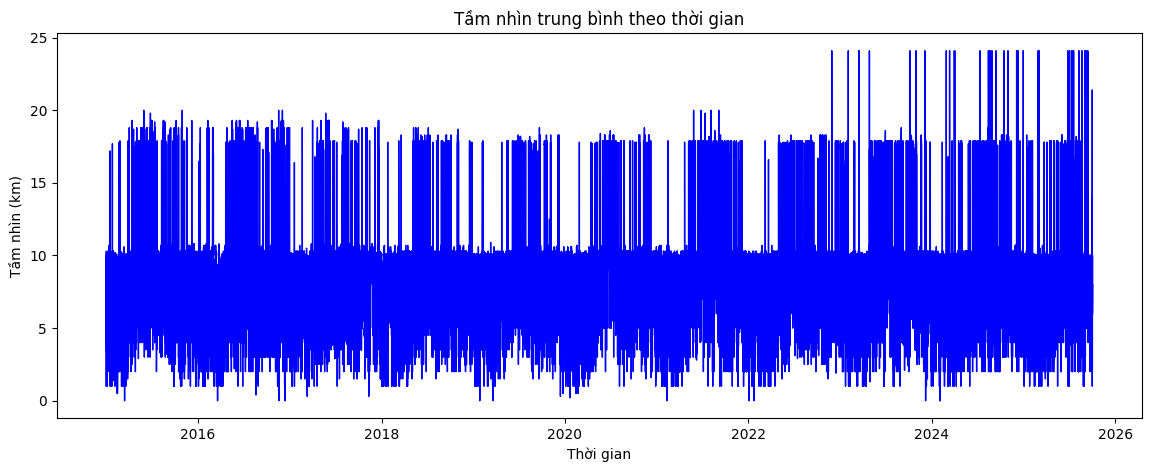

In [20]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='datetime', y='visibility', color='blue', linewidth=1)
plt.title("Tầm nhìn trung bình theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Tầm nhìn (km)")
plt.show()


**Lý do chọn**:Biểu đồ đường cho phép theo dõi xu hướng giảm/tăng tầm nhìn — đặc biệt trong các hiện tượng sương mù hoặc mưa lớn.

**Ý nghĩa**:
- Khi tầm nhìn giảm đột ngột → có thể là thời điểm sương mù dày hoặc mưa lớn.

- Giai đoạn trời quang → giá trị visibility tăng cao, thường đi cùng nhiệt độ và bức xạ cao hơn.

## Solarradiation

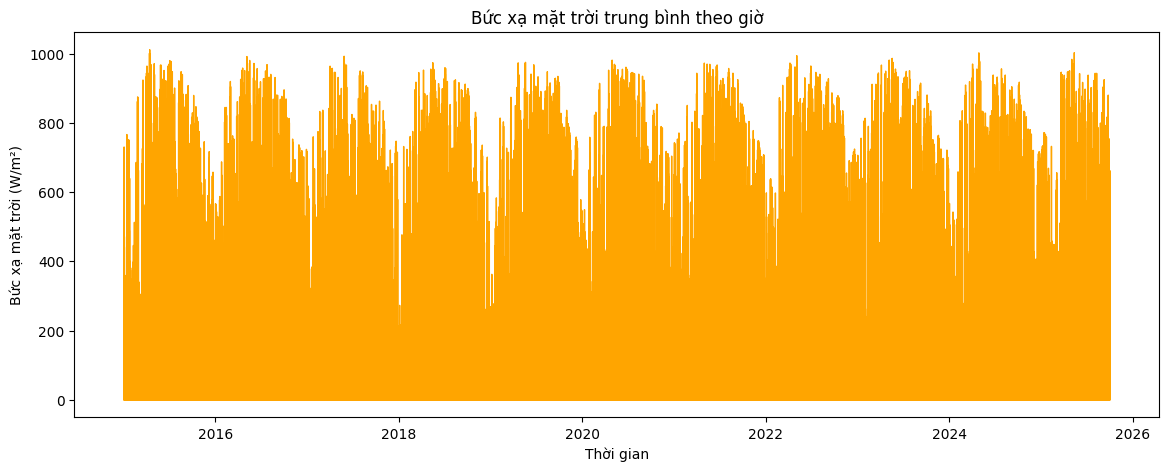

In [21]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='datetime', y='solarradiation', color='orange', linewidth=1)
plt.title("Bức xạ mặt trời trung bình theo giờ")
plt.xlabel("Thời gian")
plt.ylabel("Bức xạ mặt trời (W/m²)")
plt.show()


**Lý do chọn**:Bức xạ thay đổi theo chu kỳ ngày đêm → biểu đồ đường giúp quan sát rõ mức đỉnh vào buổi trưa.

**Ý nghĩa**:
- Bức xạ cao vào buổi trưa, thấp hoặc bằng 0 vào ban đêm.

- Có thể thấy sự giảm bức xạ khi trời nhiều mây hoặc mưa.

## Solarenergy

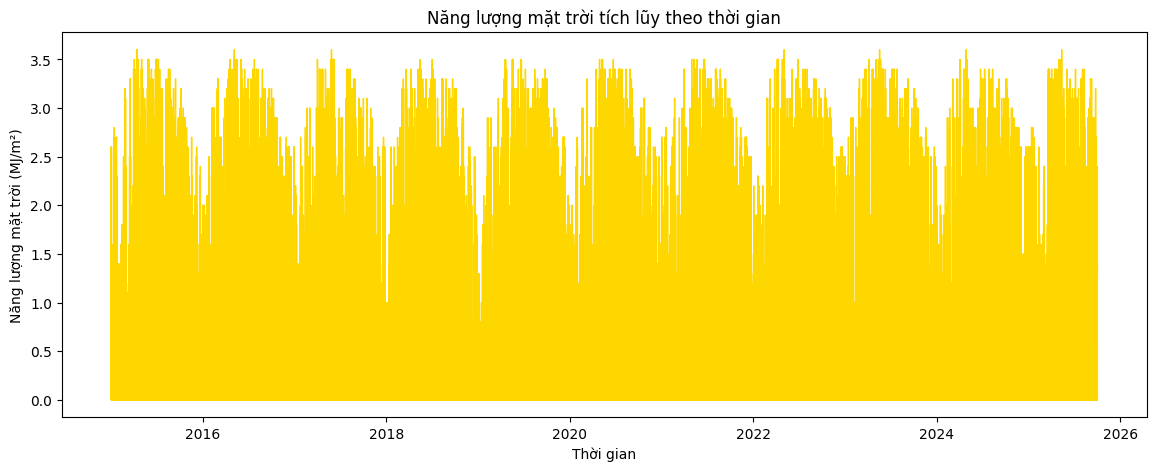

In [22]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='datetime', y='solarenergy', color='gold', linewidth=1)
plt.title("Năng lượng mặt trời tích lũy theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Năng lượng mặt trời (MJ/m²)")
plt.show()


**Lý do chọn**:Là biến tích lũy → biểu đồ đường cho thấy tốc độ và xu hướng hấp thu năng lượng mặt trời theo thời gian.

**Ý nghĩa**:
- Khi năng lượng tích lũy tăng nhanh → trời nhiều nắng, ít mây.

- Mức tích lũy thấp → thời tiết âm u hoặc mưa kéo dài.


## Uvindex

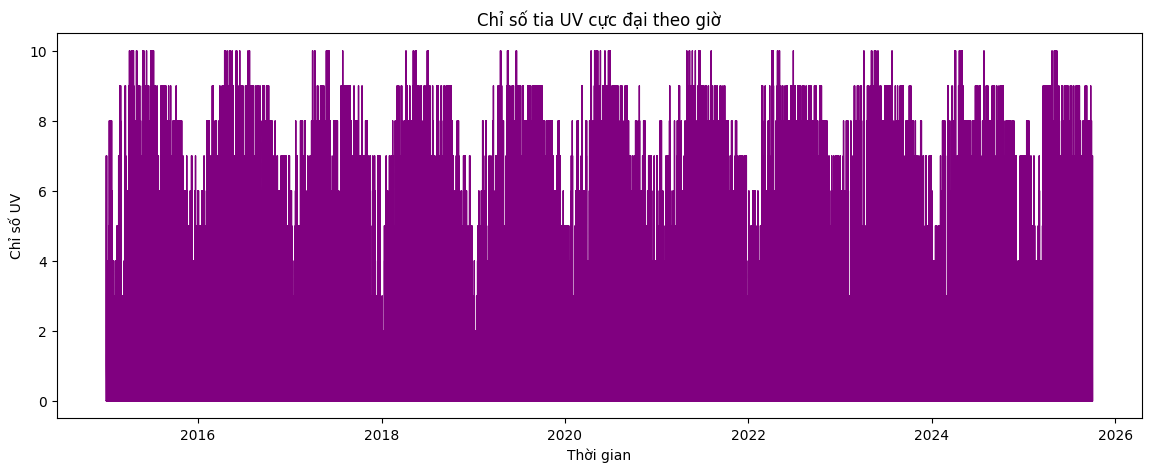

In [23]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='datetime', y='uvindex', color='purple', linewidth=1)
plt.title("Chỉ số tia UV cực đại theo giờ")
plt.xlabel("Thời gian")
plt.ylabel("Chỉ số UV")
plt.show()


**Lý do chọn**:
- Là chỉ số dao động theo chu kỳ ngày – đêm, nên line plot giúp thể hiện biến thiên rõ rệt.

- Phản ánh cường độ tia UV, một yếu tố ảnh hưởng trực tiếp đến sức khỏe và nhiệt độ.
**Ý nghĩa**:
- Giá trị UV cao nhất vào giữa trưa, giảm mạnh vào sáng sớm và chiều tối.

- Khi uvindex cao liên tục → nguy cơ nắng nóng, bỏng da, tia cực tím mạnh.

## Severerisk

/var/folders/yt/_mwvvxcn7_12mpyyfszzk3y80000gn/T/ipykernel_18179/3594749229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='severerisk', y='solarradiation', palette='coolwarm')


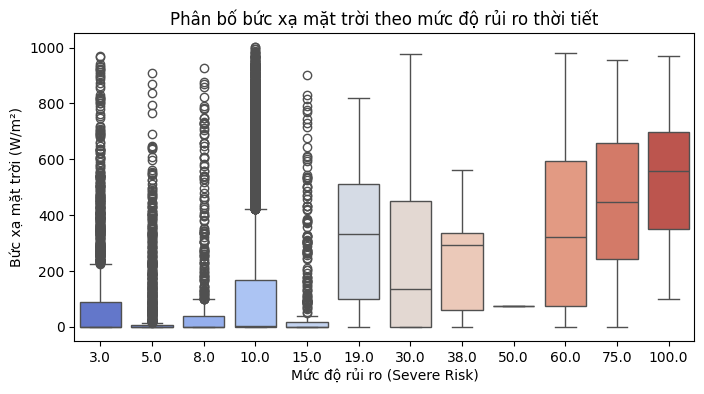

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='severerisk', y='solarradiation', palette='coolwarm')
plt.title("Phân bố bức xạ mặt trời theo mức độ rủi ro thời tiết")
plt.xlabel("Mức độ rủi ro (Severe Risk)")
plt.ylabel("Bức xạ mặt trời (W/m²)")
plt.show()


**Lý do chọn**:
- severerisk là biến rời rạc (chỉ số hoặc phân loại).

- Dùng box plot để so sánh phân bố của biến liên tục (solarradiation, temp, hoặc uvindex) theo từng mức rủi ro.

**Ý nghĩa**:
- Nhóm có severerisk cao thường đi kèm bức xạ và nhiệt độ cực đoan.

- Biểu đồ giúp phát hiện mức rủi ro nào liên quan tới điều kiện thời tiết khắc nghiệt.

## Sunrise, sunset

In [31]:
!pip install astral


Defaulting to user installation because normal site-packages is not writeable


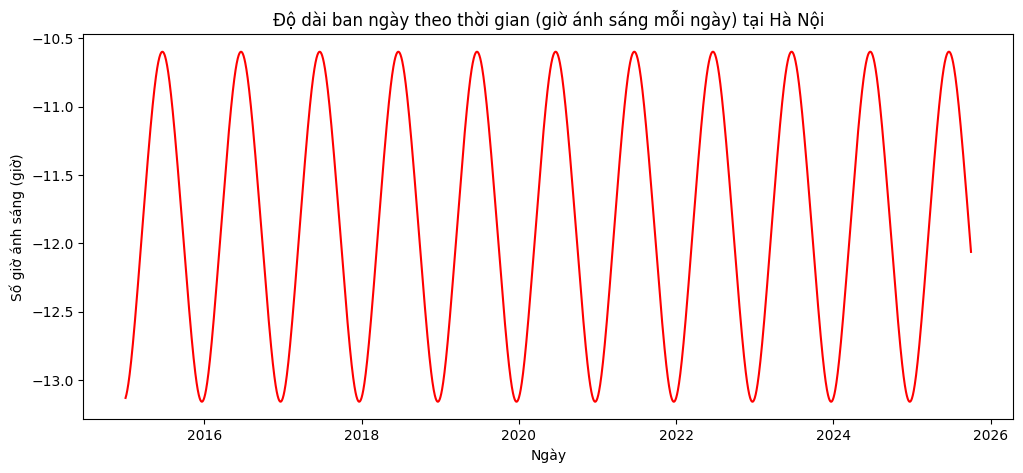

In [36]:
from astral import LocationInfo
from astral.sun import sun
import datetime

city = LocationInfo("Hanoi", "Vietnam", "Asia/Ho_Chi_Minh", 21.0285, 105.8542)

sunrise_list = []
sunset_list = []

for d in df_daily['datetime']:
    s = sun(city.observer, date=d)
    sunrise_list.append(s['sunrise'])
    sunset_list.append(s['sunset'])

df_daily['sunrise'] = sunrise_list
df_daily['sunset'] = sunset_list
df_daily['day_length'] = (df_daily['sunset'] - df_daily['sunrise']).dt.total_seconds() / 3600

# Vẽ biểu đồ độ dài ban ngày
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.lineplot(data=df_daily, x='datetime', y='day_length', color='red')
plt.title("Độ dài ban ngày theo thời gian (giờ ánh sáng mỗi ngày) tại Hà Nội")
plt.xlabel("Ngày")
plt.ylabel("Số giờ ánh sáng (giờ)")
plt.show()


**Lý do chọn**:Biểu đồ đường thể hiện chu kỳ thay đổi độ dài ngày trong năm, một yếu tố tự nhiên ảnh hưởng mạnh đến nhiệt độ và năng lượng mặt trời.

**Ý nghĩa**:
- Ban ngày dài hơn vào mùa hè, ngắn hơn vào mùa đông.

- Độ dài ngày phản ánh mức năng lượng mặt trời trung bình hấp thụ trong ngày, ảnh hưởng trực tiếp đến nhiệt độ trung bình và bức xạ.